<a href="https://colab.research.google.com/github/KaranRawat1998/Stock-prediction/blob/master/Stock_Price_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**STOCK MARKET FORECASTING USING STACKED LSTM**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/RNN LSTM/AAPL.csv')

In [ ]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [ ]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [ ]:
df_close=df.reset_index()['close']

In [ ]:
df_close

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

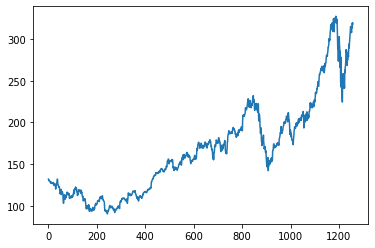

In [ ]:
plt.plot(df_close)

#**Train Test Split**

In [ ]:
##splitting dataset into train and test split
train_size=int(len(df_close)*0.65)
test_size=len(df_close)-train_size
train_data,test_data=df_close[0:train_size],df_close[train_size:]

In [ ]:
train_size,test_size

(817, 441)

#**Feature Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_data=scaler.fit_transform(np.array(train_data).reshape(-1,1))

In [ ]:
test_data=scaler.transform(np.array(test_data).reshape(-1,1))

In [ ]:
df_close=np.array(df_close).reshape(-1,1)

#**Creating Dataset**

In [ ]:
#creating dataset with time step
def create_dataset(dataset,time_step):
  X,Y = [],[]
  for i in range(len(dataset)-time_step-1):
    a=  dataset[i:(i+time_step),0]
    X.append(a)
    Y.append(dataset[i+time_step,0])
  return np.array(X),np.array(Y)

In [ ]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [ ]:
X_train.shape,y_train.shape

((716, 100), (716,))

In [ ]:
X_test.shape,y_test.shape

((340, 100), (340,))

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
X_train.shape,X_test.shape

((716, 100, 1), (340, 100, 1))

#**LSTM Model Building**

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dense

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 216ms/step - loss: 0.0423 - val_loss: 0.2051
Epoch 2/100
12/12 [==============================] - 1s 86ms/step - loss: 0.0089 - val_loss: 0.0462
Epoch 3/100
12/12 [==============================] - 1s 84ms/step - loss: 0.0033 - val_loss: 0.0410
Epoch 4/100
12/12 [==============================] - 1s 83ms/step - loss: 0.0026 - val_loss: 0.0520
Epoch 5/100
12/12 [==============================] - 1s 84ms/step - loss: 0.0023 - val_loss: 0.0465
Epoch 6/100
12/12 [==============================] - 1s 84ms/step - loss: 0.0021 - val_loss: 0.0399
Epoch 7/100
12/12 [==============================] - 1s 83ms/step - loss: 0.0021 - val_loss: 0.0310
Epoch 8/100
12/12 [==============================] - 1s 82ms/step - loss: 0.0021 - val_loss: 0.0318
Epoch 9/100
12/12 [==============================] - 1s 83ms/step - loss: 0.0021 - val_loss: 0.0306
Epoch 10/100
12/12 [==============================] - 1s 97ms/step - loss: 0.0020 - val_loss: 0.024

#**Model Evaluation**

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

141.65197416048005

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

238.11281124389922

#**Plotting**

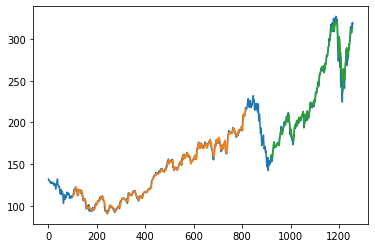

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(df_close)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

441

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[1.5978465891229172,
 1.6505029864822385,
 1.627554228230116,
 1.646180446400503,
 1.6350990254636906,
 1.672823011631562,
 1.72343602640679,
 1.7289374410562712,
 1.7810436969506442,
 1.7474064759509589,
 1.7368751964790943,
 1.7675259352404904,
 1.794954416850047,
 1.7779786230745045,
 1.7868594781515243,
 1.798883998742534,
 1.7916535680603585,
 1.7180917950330081,
 1.7867808865136747,
 1.839044325683747,
 1.8353505187048098,
 1.7224929267525932,
 1.7158126375353664,
 1.795897516504244,
 1.8163313423451743,
 1.8458817981766735,
 1.8051713297705123,
 1.817117258723672,
 1.8018704809808237,
 1.8615215341087707,
 1.8432096824897832,
 1.8438384155925807,
 1.79707639107199,
 1.8333857277585666,
 1.8072933039924552,
 1.750314366551399,
 1.6334486010688463,
 1.5540710468406158,
 1.5899874253379438,
 1.439641622131405,
 1.4383841559258097,
 1.6383998742533792,
 1.5638164099339829,
 1.6692863879283246,
 1.5921093995598867,
 1.5615372524363407,
 1.3818767683118516,
 1.5325369380697893,
 1.454

#**Forecasting next 30 days**

In [ ]:
# demonstrate prediction for next 30 days

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[1.7686547]
101
1 day input [1.65050299 1.62755423 1.64618045 1.63509903 1.67282301 1.72343603
 1.72893744 1.7810437  1.74740648 1.7368752  1.76752594 1.79495442
 1.77797862 1.78685948 1.798884   1.79165357 1.7180918  1.78678089
 1.83904433 1.83535052 1.72249293 1.71581264 1.79589752 1.81633134
 1.8458818  1.80517133 1.81711726 1.80187048 1.86152153 1.84320968
 1.84383842 1.79707639 1.83338573 1.8072933  1.75031437 1.6334486
 1.55407105 1.58998743 1.43964162 1.43838416 1.63839987 1.56381641
 1.66928639 1.5921094  1.56153725 1.38187677 1.53253694 1.45465262
 1.24088337 1.4746149  1.1935712  1.2772713  1.22862307 1.21376925
 1.09163785 1.05336372 1.2302735  1.21958504 1.32112543 1.23703238
 1.29259667 1.2885099  1.18335429 1.21494813 1.18728387 1.35279786
 1.328906   1.38109085 1.39618045 1.43751965 1.54597611 1.5253851
 1.54314681 1.51257466 1.46644137 1.39916693 1.45991826 1.45150896
 1.51391072 1.51548255 1.47940899 1.55132034 1.59902546 1.56185162
 1.5939956  1.62857592 1.65270355 1.

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df_close)

1258

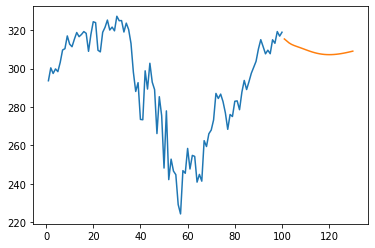

In [ ]:
#plotting last 100 days and future 30 days
plt.plot(day_new,df_close[1158:])
plt.plot(day_pred,scaler.inverse_transform(lst_output))

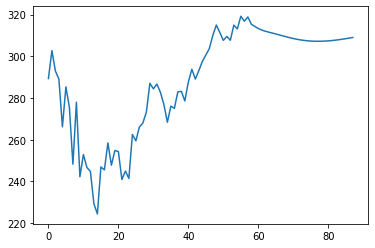

In [ ]:
df_total=df_close.tolist()
df_total.extend(scaler.inverse_transform(lst_output))
plt.plot(df_total[1200:])